In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving sleepdata.csv to sleepdata.csv


In [ ]:
df=pd.read_csv('sleepdata.csv')

In [ ]:
df.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


In [ ]:
df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.386641,36.535418,2.005834,7.471921,2.592946,148.260148,4.940956,0.504222,8.036684
std,19.584319,0.498727,0.983454,1.540699,2.979500,94.031760,2.032708,0.204137,2.023371
min,5.174653,35.029806,-1.019512,3.105827,1.000000,0.000000,0.000000,0.000000,0.326689
25%,57.048194,36.196879,1.352000,6.393869,1.000000,80.630719,3.489725,0.361569,6.726291
50%,70.506012,36.531539,1.999749,7.500277,1.000000,145.717293,4.890507,0.500996,8.038248
75%,82.958878,36.864441,2.660915,8.500418,2.537789,211.244685,6.399490,0.644680,9.354408
max,147.054630,38.096554,5.926238,12.364639,10.000000,400.000000,10.000000,1.000000,14.754766


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [ ]:
df.isnull().sum() #checking for null values

,0
Heart_Rate_Variability,0
Body_Temperature,0
Movement_During_Sleep,0
Sleep_Duration_Hours,0
Sleep_Quality_Score,0
Caffeine_Intake_mg,0
Stress_Level,0
Bedtime_Consistency,0
Light_Exposure_hours,0


In [ ]:
df.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713


In [ ]:
df.shape

(1000, 9)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y=df['Sleep_Quality_Score']

In [ ]:
x=df.drop(columns=['Sleep_Quality_Score'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Train Multiple Linear Regression (MLR)
mlr_model = LinearRegression()
mlr_model.fit(X_train_knn, y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred = mlr_model.predict(X_test_knn)

In [ ]:
# Evaluate model
print("\nMLR Results:")
print("Coefficients:", mlr_model.coef_)  # Impact of each feature on sleep quality
print("Intercept:", mlr_model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))  # Closer to 1 = better fit


MLR Results:
Coefficients: [ 0.12341447 -0.01956227 -0.20673019  0.21265812 -2.13024171 -0.12321372
 -0.12469195  0.03770522]
Intercept: 2.600397529200796
MSE: 3.932964456322623
R² Score: 0.5476936815546473


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Heart_Rate_Variability'),
  Text(1, 0, 'Body_Temperature'),
  Text(2, 0, 'Movement_During_Sleep'),
  Text(3, 0, 'Sleep_Duration_Hours'),
  Text(4, 0, 'Caffeine_Intake_mg'),
  Text(5, 0, 'Stress_Level'),
  Text(6, 0, 'Bedtime_Consistency'),
  Text(7, 0, 'Light_Exposure_hours')])

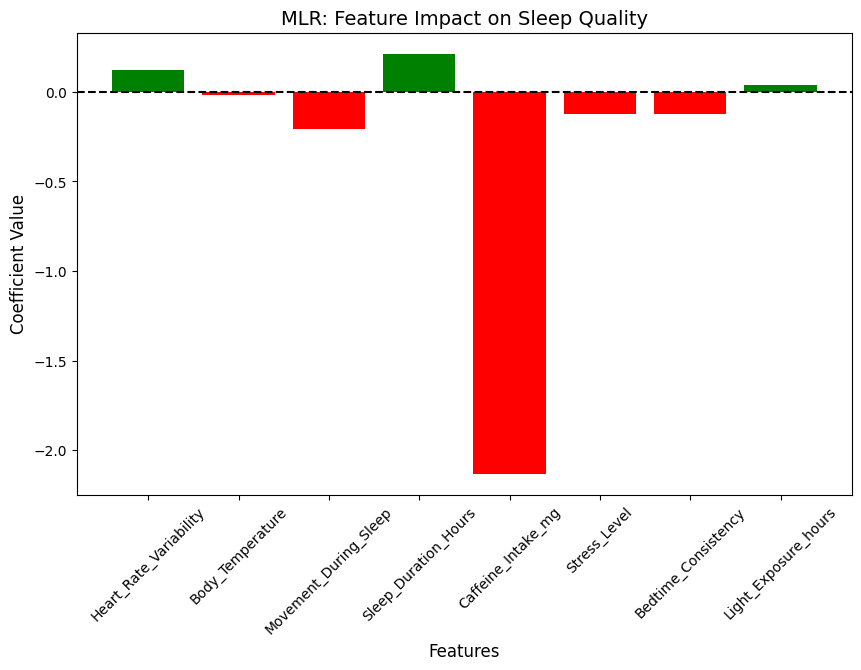

In [ ]:
# Feature importance plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(coefs.index, coefs.values, color=np.where(coefs.values < 0, 'red', 'green'))
plt.axhline(0, color='black', linestyle='--')
plt.title("MLR: Feature Impact on Sleep Quality", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.xticks(rotation=45)


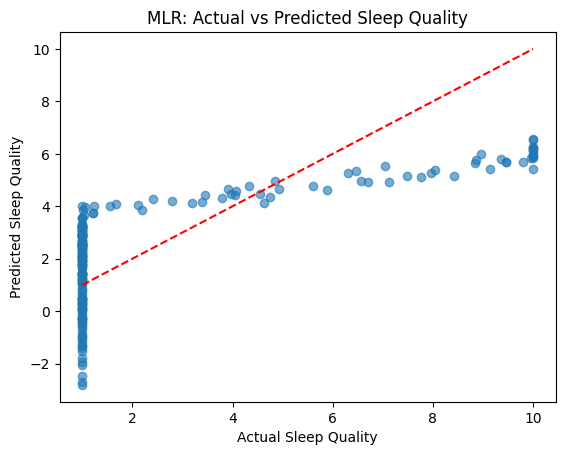

In [ ]:
# Actual vs Predicted plot
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("MLR: Actual vs Predicted Sleep Quality")
plt.show()

In [ ]:
# Define feature columns
features = ['Heart_Rate_Variability', 'Body_Temperature', 'Movement_During_Sleep',
            'Sleep_Duration_Hours', 'Caffeine_Intake_mg', 'Stress_Level',
            'Bedtime_Consistency', 'Light_Exposure_hours']

#for ensuring that all columns exist
for col in features + ['Sleep_Quality_Score']:
    if col not in df.columns:
        print(f"Error: Column {col} not found in dataset")
        exit()

# Extract features and target
x = df[features]
y = df['Sleep_Quality_Score']  # Keeping it as a numerical range

# Verify dataset after selection
print(x.shape, y.shape)

(1000, 8) (1000,)


In [ ]:
 #Train KNN model for regression
knn = KNeighborsRegressor(n_neighbors=3)  # k=3, can be tuned
knn.fit(X_train_knn, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Make predictions
y_pred = knn.predict(X_test_knn)

In [ ]:
# Model Evaluation Metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error,mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.765672482348008
Mean Squared Error: 2.1639412223906542


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the values of hyperparameters to test
param_grid = {
    'n_neighbors': range(1, 21),  # Test K values from 1 to 20
    'weights': ['uniform', 'distance'],  # Two types of weighting strategies
    'metric': ['euclidean', 'manhattan']  # Different ways to measure distance
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_knn, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_knn = grid_search.best_estimator_

# Test the optimized model
y_pred = best_knn.predict(X_test_knn)

# Evaluate the optimized model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mean Absolute Error: 0.6622420674344062
Mean Squared Error: 1.666287220450996


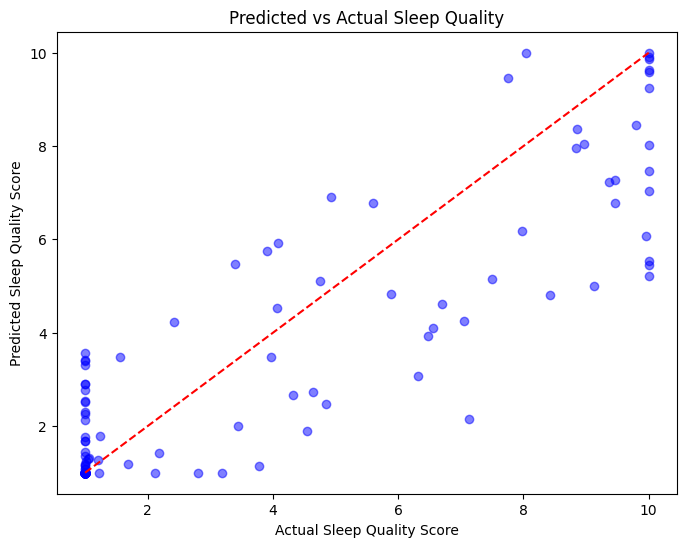

In [ ]:
import matplotlib.pyplot as plt
#plotting predicted vs actual sleep quality scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal reference line
plt.xlabel("Actual Sleep Quality Score")
plt.ylabel("Predicted Sleep Quality Score")
plt.title("Predicted vs Actual Sleep Quality")
plt.show()

In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

<ipython-input-41-8cf69113cecf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="mako")


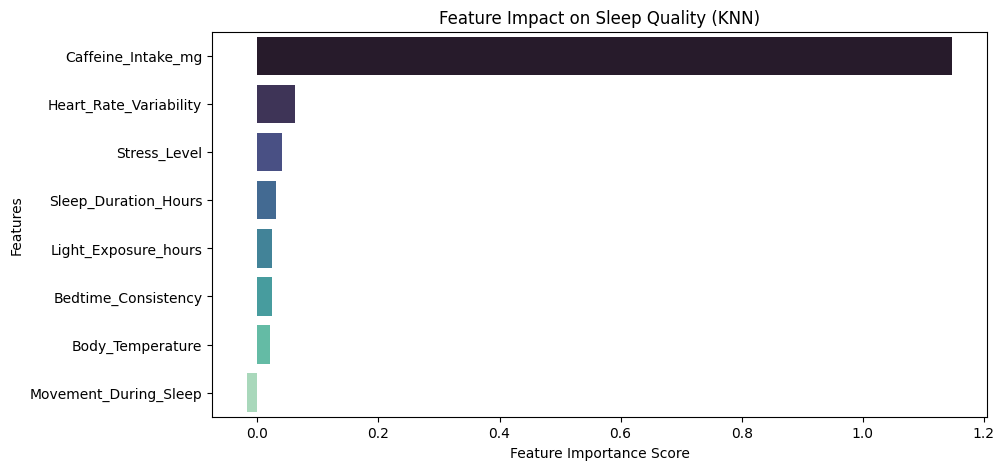

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)  # Adjust 'n_neighbors' if needed
knn.fit(X_train_knn, y_train)

# Compute permutation importance
perm_importance = permutation_importance(knn, X_test_knn, y_test, n_repeats=10, random_state=42, scoring='r2')

# Extract feature importance values
importances = perm_importance.importances_mean

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="mako")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Impact on Sleep Quality (KNN)")
plt.show()

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

0.9986828829732404

In [ ]:
model.score(X_test,y_test)

0.9938797850646947

In [ ]:
estimators=[10,50,100,150,200,300]
depths=[5,10,15,20,None]

train_scores = {depth: [] for depth in depths}
test_scores = {depth: [] for depth in depths}

#calculating for different estimators and depths
for n in estimators:
  for depth in depths:
    model=RandomForestRegressor(n_estimators=n,max_depth=depth,random_state=30)
    model.fit(X_train,y_train)
    trained=model.score(X_train,y_train)
    tested=model.score(X_test,y_test)
    train_scores[depth].append(trained)
    test_scores[depth].append(tested)


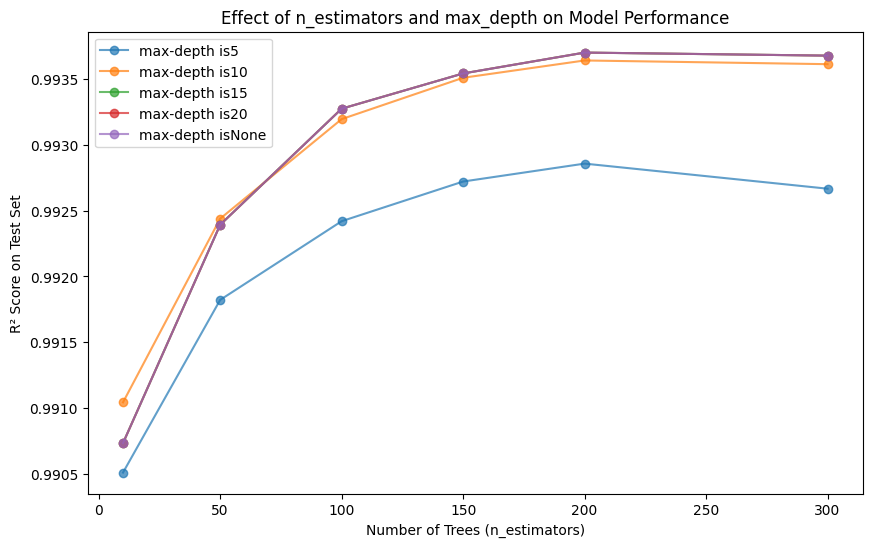

In [ ]:
#plotting
plt.figure(figsize=(10,6))
for depth in depths:
  #for each depth there will be a different graph
  #for each depth the y axis will be the test scores for that depth
  #the x axis will be the corresponding estimator values
  plt.plot(estimators,test_scores[depth],label=f'max-depth is{depth}',marker='o',alpha=0.7)


plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('R² Score on Test Set')
plt.title('Effect of n_estimators and max_depth on Model Performance')
plt.legend()
plt.show()


In [ ]:
#GRAPH ANALYSIS
#from the graph we can interpret that a very good r2 test score can be achieved by 100 trees
#and even higher in 150 trees,after that the increase is not significant
#we have to choose between 100 and 150 for estimators
#for 100 also the score is considerably high and more trees means more time for computation
#so lets go for 100 trees
#for choosing depth,need to make a choice between none and 10 for optimal result

In [ ]:
#choosing between depth=10 and depth=none
#comparing the test and train scores for both
index_100 = 2
test_10=test_scores[10][index_100]
train_10=train_scores[10][index_100]

test_none=test_scores[None][index_100]
train_none=train_scores[None][index_100]

print(f"Depth = 10 -> Train Score: {train_10:.5f}, Test Score: {test_10:.5f}")
print(f"Depth = None -> Train Score: {train_none:.5f}, Test Score: {test_none:.5f}")

Depth = 10 -> Train Score: 0.99857, Test Score: 0.99320
Depth = None -> Train Score: 0.99860, Test Score: 0.99327


In [ ]:
from sklearn.model_selection import cross_val_score

model_depth_10 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_depth_none = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

cv_scores_10 = cross_val_score(model_depth_10, X_train, y_train, cv=5, scoring='r2')
cv_scores_none = cross_val_score(model_depth_none, X_train, y_train, cv=5, scoring='r2')

print(f"Mean CV Score (max_depth=10): {np.mean(cv_scores_10):.5f}")
print(f"Mean CV Score (max_depth=None): {np.mean(cv_scores_none):.5f}")


Mean CV Score (max_depth=10): 0.98904
Mean CV Score (max_depth=None): 0.98898


In [ ]:
#the results for both depth=10 and none are very high and almost similar
#since depth=none is only very very slightly higher than depth=10
#this means that depth=none is not creating a considerable difference
#and will only contibute to more computational time
#also cross validation score for depth=10 is more
#so lets choose depth=10

In [ ]:
#FINAL CHOSEN FOR RANDOM FOREST REGRESSOR
#max-depth is 10 and n_estimators is 100
final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=30)
final_model.fit(X_train, y_train)

train_score = final_model.score(X_train, y_train)
test_score = final_model.score(X_test, y_test)

print(f"Final Model -> Train Score: {train_score:.5f}, Test Score: {test_score:.5f}")

Final Model -> Train Score: 0.99857, Test Score: 0.99320


In [ ]:
feature_importances = model.feature_importances_

feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]

for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importances[i]:.5f}")

Caffeine_Intake_mg: 0.98888
Movement_During_Sleep: 0.00316
Sleep_Duration_Hours: 0.00278
Stress_Level: 0.00277
Bedtime_Consistency: 0.00078
Heart_Rate_Variability: 0.00056
Body_Temperature: 0.00056
Light_Exposure_hours: 0.00050


<ipython-input-67-3011a8df6923>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X_train.columns, palette="Blues_r")


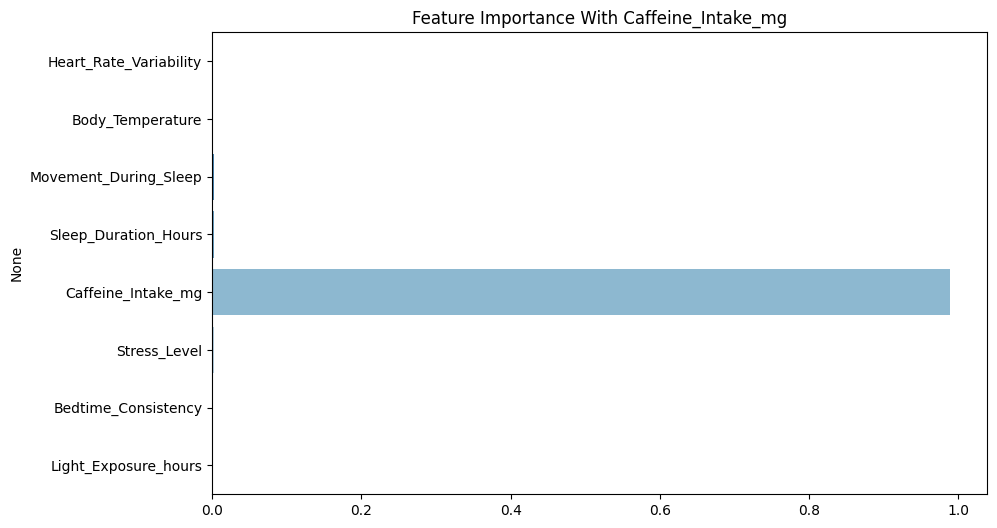

In [ ]:
model.fit(X_train, y_train)

importances = model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=X_train.columns, palette="Blues_r")
plt.title("Feature Importance With Caffeine_Intake_mg")
plt.show()


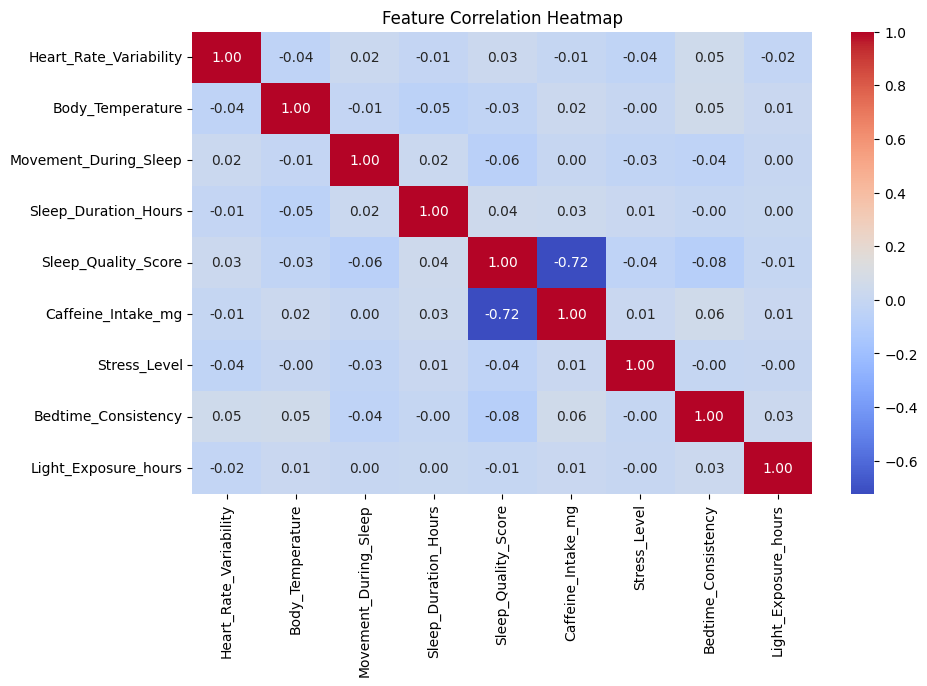

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-61-ac2ff30a6902>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_importances, y=X_new.columns.tolist(), palette="Blues_r")


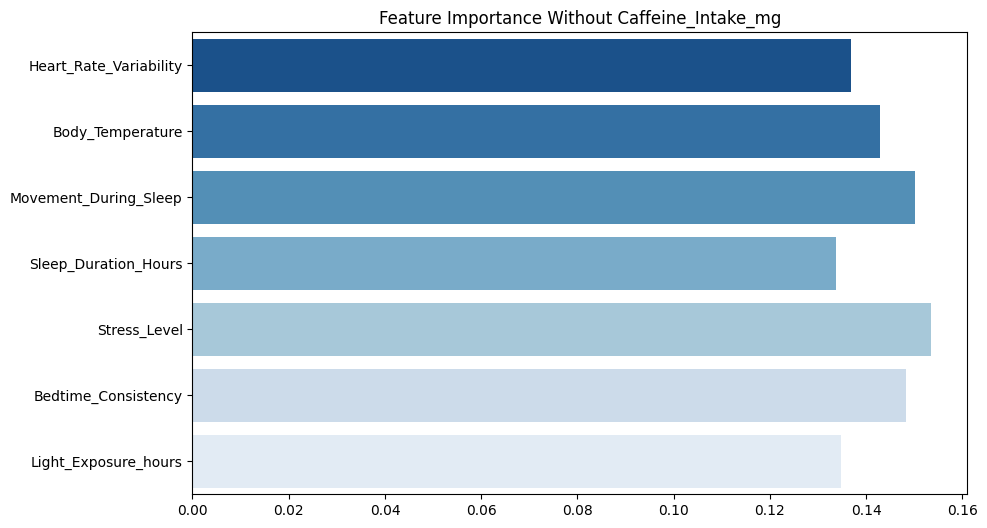

In [ ]:
X_new = X_train.drop(columns=['Caffeine_Intake_mg'])
model.fit(X_new, y_train)

new_importances = model.feature_importances_

plt.figure(figsize=(10,6))

sns.barplot(x=new_importances, y=X_new.columns.tolist(), palette="Blues_r")

plt.title("Feature Importance Without Caffeine_Intake_mg")
plt.show()

In [ ]:
X_new = X_train.drop(columns=['Caffeine_Intake_mg'])
X_test_new = X_test.drop(columns=['Caffeine_Intake_mg'])

model.fit(X_new, y_train)

train_new_score = model.score(X_new, y_train)
test_new_score = model.score(X_test_new, y_test)

print('The train score is', train_new_score)
print('The test score is', test_new_score)

The train score is 0.5899408046351954
The test score is -0.014358524216254054


In [ ]:
#since model becomes worse in absense of caffeine intake,we shall include
#caffiene intake in final model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


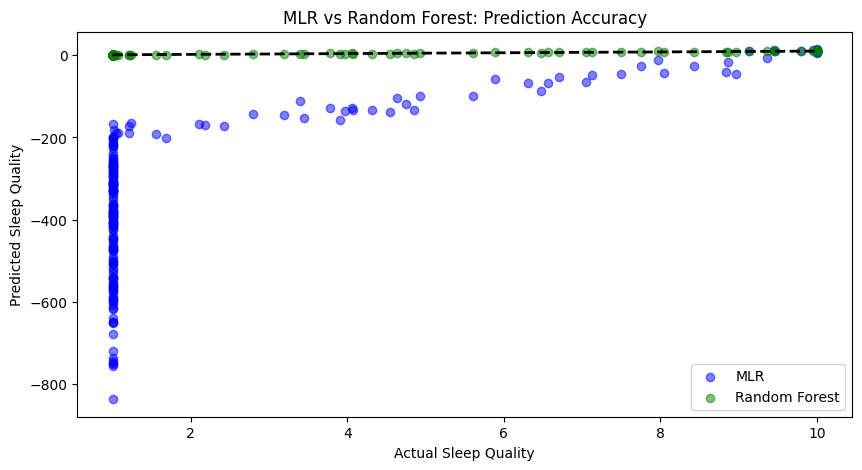

In [ ]:
import matplotlib.pyplot as plt

# Predictions
mlr_pred = mlr_model.predict(X_test)
rf_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, mlr_pred, alpha=0.5, label='MLR', color='blue')
plt.scatter(y_test, rf_pred, alpha=0.5, label='Random Forest', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.title("MLR vs Random Forest: Prediction Accuracy")
plt.legend()
plt.show()

In [ ]:
#Closer to the dashed line = more accurate predictions.
# R² Score: 0.5476936815546473- mlr
#  Train Score: 0.99857, Test Score: 0.99320 -random forest
#hence we choose random forest
